Load Data
========

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("https://raw.githubusercontent.com/drnesr/WaterConsumption/master/data/SampleData.csv")
data.head()
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date")
data.head()


,Date,reference,target
0,2010-01-15,12.0,12.0
1,2010-02-15,18.0,18.0
2,2010-03-15,22.0,22.0
3,2010-04-15,26.0,26.0
4,2010-05-15,31.0,NaN


Fill Missing Values
===================

In [22]:
data.isnull().sum()
data["mean_fill"]=data["target"].fillna(data["target"].mean())
data["median_fill"]=data["target"].fillna(data["target"].median())
data["moving_avg_fill"]=data["target"].fillna(data["target"].rolling(25,min_periods=1,).mean())
data["linear"]=data["target"].fillna(data["target"].interpolate(method='linear'))
data["spline"]=data["target"].fillna(data["target"].interpolate(method='spline',order=5))
data["polynomial"]=data["target"].fillna(data["target"].interpolate(method='polynomial', order=5))
#data["time"]=data["target"].fillna(data["target"].interpolate(method='time'))

In [20]:
data[["moving_avg_fill","target","reference"]]

,moving_avg_fill,target,reference
0,12.000000,12.000000,12.000000
1,18.000000,18.000000,18.000000
2,22.000000,22.000000,22.000000
3,26.000000,26.000000,26.000000
4,NaN,NaN,31.000000
5,NaN,NaN,38.000000
6,45.000000,45.000000,45.000000
7,43.000000,43.000000,43.000000
8,NaN,NaN,35.000000
9,29.000000,29.000000,29.000000


Visualize different results using different methods
============================

Text(0.5, 1.0, 'polynomial')

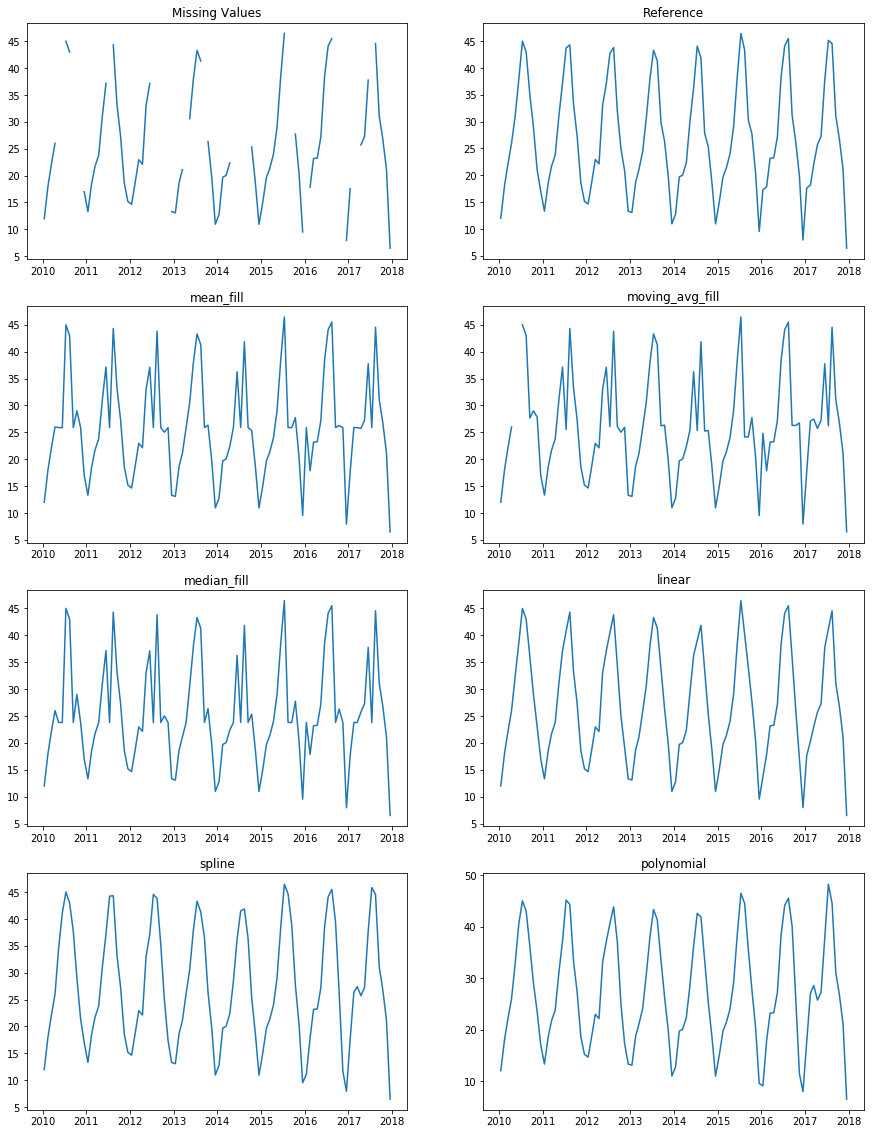

In [116]:
from statsmodels.graphics.tsaplots import plot_acf
figure,ax=plt.subplots(nrows=4, ncols=2, figsize=(15,20))
ax[0,0].plot(data["Date"],data["target"])
ax[0,0].set_title("Missing Values")
ax[0,1].plot(data["Date"],data["reference"])
ax[0,1].set_title("Reference")
ax[1,0].plot(data["Date"],data["mean_fill"])
ax[1,0].set_title("mean_fill")
ax[1,1].plot(data["Date"],data["moving_avg_fill"])
ax[1,1].set_title("moving_avg_fill")
ax[2,0].plot(data["Date"],data["median_fill"])
ax[2,0].set_title("median_fill")
ax[2,1].plot(data["Date"],data["linear"])
ax[2,1].set_title("linear")
ax[3,0].plot(data["Date"],data["spline"])
ax[3,0].set_title("spline")
ax[3,1].plot(data["Date"],data["polynomial"])
ax[3,1].set_title("polynomial")
#ax[4,0].plot(data["Date"],data["time"])
#ax[4,0].set_title("time")



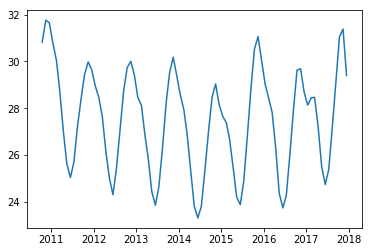

In [122]:
plt.plot(data["Date"],data["spline"].rolling(window=10).mean())

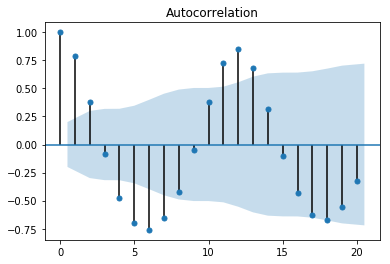

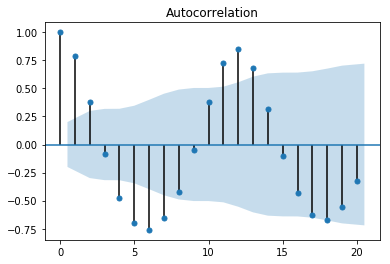

In [117]:
plot_acf(data["spline"])# Data is not stationary


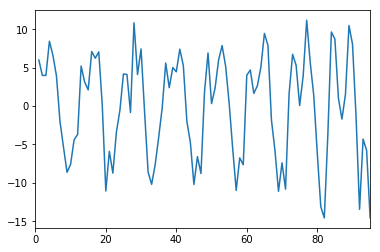

In [67]:
data["spline"].diff(periods=1).plot()

create Dataset and model
===========

In [84]:
import numpy as np
from sklearn.preprocessing import StandardScaler
def create_dataset(data, time_steps=1):
    Xs, ys = [], []
    for i in range(len(data) - time_steps-1):
        v = data[i:(i + time_steps)]
        Xs.append(v)
        ys.append(data[i + time_steps])
    return np.array(Xs), np.array(ys)

#time step or look back
tstep=15
X=np.array(data["spline"]).astype(np.float)
print(X.shape)
X = np.reshape(X, (-1, 1)) # need to reshape since it has single feature
scaler = StandardScaler()
X = scaler.fit_transform(X)
n_samples_split=int(len(X)*0.2)
x_train=X[:-n_samples_split]
x_test=X[-n_samples_split:]

X_train, Y_train = create_dataset(x_train, tstep)
X_test, Y_test = create_dataset(x_test, tstep)




print(X_train.shape, Y_train.shape)


(96,)
(61, 15, 1) (61, 1)


In [86]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

#cell, input gate, an output gate and a forget gate
model=Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True)) ##stake of LSTM is used 
model.add(LSTM(units=64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [87]:
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=2048,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/50
1/1 [==============================] - 0s 464ms/step - loss: 0.9424 - val_loss: 0.9356
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 0.9299 - val_loss: 0.9255
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 0.9122 - val_loss: 0.9146
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 0.8997 - val_loss: 0.8998
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 0.8811 - val_loss: 0.8812
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 0.8588 - val_loss: 0.8587
Epoch 7/50
1/1 [==============================] - 0s 40ms/step - loss: 0.8369 - val_loss: 0.8327
Epoch 8/50
1/1 [==============================] - 0s 41ms/step - loss: 0.8088 - val_loss: 0.8012
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 0.7647 - val_loss: 0.7624
Epoch 10/50
1/1 [==============================] - 0s 42ms/step - loss: 0.7213 - val_loss: 0.7154
Epoch 11/50
1/1 [===========

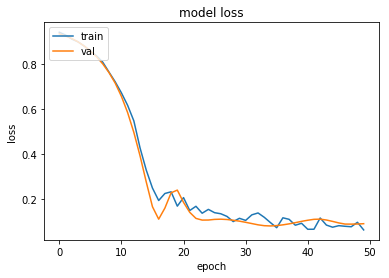

In [88]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [89]:
from sklearn.metrics import *
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))


Train Mean Absolute Error: 2.0528034404084528
Train Root Mean Squared Error: 2.574862831521385
Test Mean Absolute Error: 2.4812097200618495
Test Root Mean Squared Error: 2.514577892519035


[31.09908801 26.80392567 21.05475906]


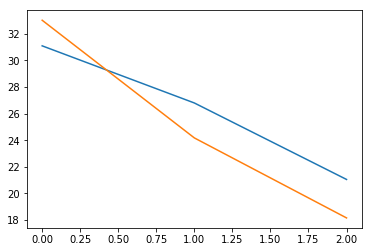

In [113]:
import matplotlib.pyplot as plt
y=Y_test.reshape(1,-1)[0]
x=range(len(y))
z=test_predict.reshape(1,-1)[0]
print(y)
plt.plot(x,y,z)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]